In [168]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.reset_orig()

In [173]:
def create_arms(num_arms=10, mean_val=0, sigma=1):
    arms = np.random.normal(mean_val, sigma, num_arms)
    return arms

def sample_arm(arm_choice, arms, sigma=1):
    value = np.random.normal(arms[arm_choice], sigma)
    return value

def greedy(arm_averages):
    a = random_argmax(arm_averages)
    return a

def e_greedy(arm_averages, epsilon=.01):
    if not np.random.binomial(1, epsilon):
        a = random_argmax(arm_averages)
    else:
        a = np.random.choice(range(len(arm_averages)))

    return a


def ucb(arm_averages, arm_counts, num_arms, i, c):
    a = random_argmax(arm_averages + c*np.sqrt(np.log(i+1)/arm_counts))
    return a


def random_argmax(arr):
    a = np.random.choice(np.flatnonzero(arr == arr.max()))
    return a


def simulation(policy, num_arms=10, epsilon=.01, c=2, max_runs = 2000, max_steps = 1000):    
    
    all_run_returns = np.zeros((max_runs, max_steps))
    all_run_optimal = np.zeros((max_runs, max_steps))
    all_run_regret = np.zeros((max_runs, max_steps))
    
    for run in xrange(max_runs):
        bandit_arms = create_arms(num_arms)
        optimal_action = random_argmax(bandit_arms)
        optimal_return = bandit_arms.max()
        
        arm_returns = np.zeros(num_arms)
        arm_averages = np.zeros(num_arms)
        arm_counts = np.ones(num_arms)
        
        optimal_counts = np.zeros(max_steps)
        samples = np.zeros(max_steps)
        
        for i in xrange(max_steps):
            
            if policy == 'greedy':
                a = greedy(arm_averages)
            elif policy == 'e-greedy':
                a = e_greedy(arm_averages, epsilon)
            elif policy == 'ucb':
                a = ucb(arm_averages, arm_counts, num_arms, i, c)
                
            if a == optimal_action:
                optimal_counts[i] = 1
            else:
                optimal_counts[i] = 0 

            reward = sample_arm(a, bandit_arms)
            samples[i] = reward
            
            # Using incremental implementation for efficiency.
            arm_returns[a] += reward
            arm_averages[a] = arm_returns[a]/arm_counts[a] 
            arm_counts[a] += 1.
        
        all_run_returns[run] = samples
        all_run_optimal[run] = optimal_counts
        all_run_regret[run] = optimal_return - samples

    
    average_rewards = all_run_returns.mean(axis=0)
    average_optimal = all_run_optimal.mean(axis=0) * 100
    average_regret = all_run_regret.mean(axis=0).cumsum()

    return average_rewards, average_optimal, average_regret

In [171]:
greedy, greedy_opt, greedy_regret = simulation(policy='greedy')
e_greedy_01, e_greedy_01_opt, e_greedy_01_regret = simulation(policy='e-greedy', epsilon=.01)
e_greedy_10, e_greedy_10_opt, e_greedy_10_regret = simulation(policy='e-greedy', epsilon=.1)
ucb, ucb_opt, ucb_regret = simulation(policy='ucb')

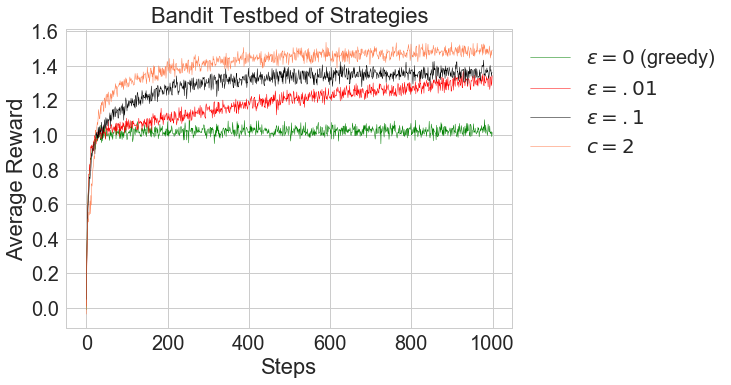

In [165]:
sns.set()
sns.set_style("whitegrid")

fig = plt.figure()
ax = plt.axes()

plt.plot(greedy, color='green', label=r'$\epsilon = 0$ (greedy)', lw=.5)
plt.plot(e_greedy_01, color='red', label=r'$\epsilon = .01$', lw=.5)
plt.plot(e_greedy_10, color='black', label=r'$\epsilon = .1$', lw=.5)
plt.plot(ucb, color='coral', label=r'$c = 2$', lw=.5)

plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)

lgd = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fancybox=True, fontsize=20)

plt.xlabel('Steps', fontsize=22)
plt.ylabel('Average Reward', fontsize=22)
plt.title('Bandit Testbed of Strategies', fontsize=22)

plt.show()
sns.reset_orig()

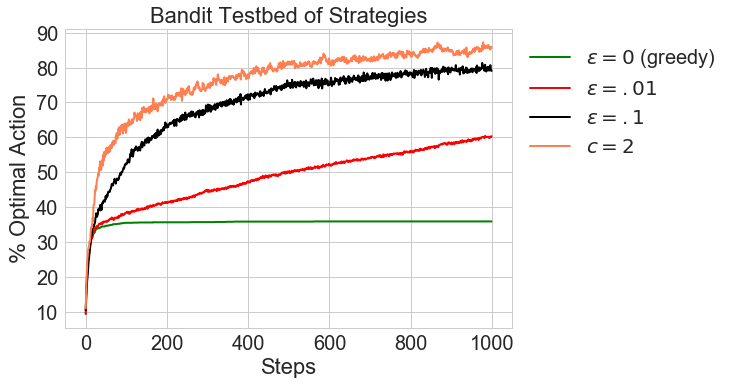

In [166]:
sns.set()
sns.set_style("whitegrid")

fig = plt.figure()
ax = plt.axes()

plt.plot(greedy_opt, color='green', label=r'$\epsilon = 0$ (greedy)', lw=2)
plt.plot(e_greedy_01_opt, color='red', label=r'$\epsilon = .01$', lw=2)
plt.plot(e_greedy_10_opt, color='black', label=r'$\epsilon = .1$', lw=2)
plt.plot(ucb_opt, color='coral', label=r'$c = 2$', lw=2)

plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)

lgd = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fancybox=True, fontsize=20)

plt.xlabel('Steps', fontsize=22)
plt.ylabel(r'$\%$ Optimal Action', fontsize=22)
plt.title('Bandit Testbed of Strategies', fontsize=22)

plt.show()
sns.reset_orig()

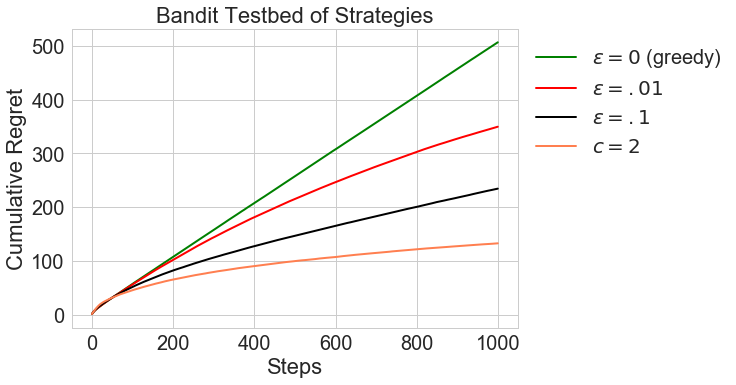

In [167]:
sns.set()
sns.set_style("whitegrid")

fig = plt.figure()
ax = plt.axes()

plt.plot(greedy_regret, color='green', label=r'$\epsilon = 0$ (greedy)', lw=2)
plt.plot(e_greedy_01_regret, color='red', label=r'$\epsilon = .01$', lw=2)
plt.plot(e_greedy_10_regret, color='black', label=r'$\epsilon = .1$', lw=2)
plt.plot(ucb_regret, color='coral', label=r'$c = 2$', lw=2)

plt.setp(ax.get_xticklabels(), fontsize=20)
plt.setp(ax.get_yticklabels(), fontsize=20)

lgd = plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fancybox=True, fontsize=20)

plt.xlabel('Steps', fontsize=22)
plt.ylabel('Cumulative Regret', fontsize=22)
plt.title('Bandit Testbed of Strategies', fontsize=22)

plt.show()
sns.reset_orig()